# Machine learning workflow demo

## Predicting house prices with California data

## Load libs

In [1]:
import warnings
warnings.simplefilter("ignore")
from local.lib import calhousing as ch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Loading BokehJS ...


## Inspect data in source format

In [2]:
!head local/data/cal_housing_small.data
!wc local/data/cal_housing_small.data

longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
-120.58,35.0,37.0,523.0,119.0,106300.0
-118.17,33.98,31.0,1236.0,329.0,155400.0
-122.22,37.81,52.0,1971.0,335.0,273700.0
-117.91,33.66,21.0,1708.0,505.0,193800.0
-121.92,37.24,27.0,1265.0,216.0,281200.0
-117.01,32.71,20.0,3506.0,692.0,129100.0
-116.39,34.15,15.0,5583.0,1149.0,73300.0
-120.67,35.5,15.0,2752.0,546.0,175000.0
-118.18,34.04,36.0,1807.0,630.0,129000.0
  501   501 20363 local/data/cal_housing_small.data


## Load data in Python's memory

In [3]:
d = pd.read_csv("local/data/cal_housing_small.data")
print (d.shape)
d.head()

(500, 6)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
0,-120.58,35.00,37.0,523.0,119.0,106300.0
1,-118.17,33.98,31.0,1236.0,329.0,155400.0
2,-122.22,37.81,52.0,1971.0,335.0,273700.0
3,-117.91,33.66,21.0,1708.0,505.0,193800.0
4,-121.92,37.24,27.0,1265.0,216.0,281200.0


## Show house locations on map

observa como el valor de las casas es más caro en zonas urbanas

In [4]:
ds = d.sample(500)
ch.plot_map(ds["latitude"].values, 
         ds["longitude"].values, ds["medianHouseValue"].values.reshape(-1,1)/1e5) 

## Separate variable to predict

In [5]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print (X.shape, y.shape)

(500, 5) (500,)


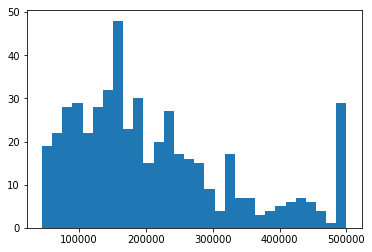

In [7]:
plt.hist(y, bins=30);

Split data from train and test

In [8]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
print (Xtr.shape, ytr.shape)
print (Xts.shape, yts.shape)

(350, 5) (350,)
(150, 5) (150,)


Create model with train data

In [9]:
dt = DecisionTreeRegressor()
dt = SVC()
dt.fit(Xtr,ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Measure performance

In [10]:
print ("train score", ch.rel_rmse(dt, Xtr, ytr))
print ("test score ", ch.rel_rmse(dt, Xts, yts))

train score 0.0
test score  2.283966919730345


## Plot geographical distribution of errors

- limit errors to <1

In [11]:
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1] = 1
ch.plot_map(Xts[:,1], Xts[:,0], errs.reshape(-1,1))

## Make a parameter search

In [12]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
best

mean_fit_time               0.00106225
std_fit_time               7.47981e-06
mean_score_time            0.000102472
std_score_time             1.99703e-06
param_max_depth                      9
params                {'max_depth': 9}
split0_test_score             0.449496
split1_test_score             0.469986
split2_test_score             0.367849
split3_test_score             0.381168
split4_test_score             0.497078
split5_test_score              0.49854
split6_test_score             0.378602
split7_test_score             0.403081
split8_test_score             0.395234
split9_test_score             0.406021
mean_test_score               0.424706
std_test_score               0.0472158
rank_test_score                     19
split0_train_score           0.0847402
split1_train_score            0.166943
split2_train_score            0.105417
split3_train_score             0.12864
split4_train_score            0.191847
split5_train_score            0.114409
split6_train_score       

In [13]:
r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000800,0.000461,0.000241,6.749628e-05,1,{'max_depth': 1},0.682824,0.497395,0.566530,0.628341,...,0.605847,0.593575,0.601340,0.634560,0.626456,0.612894,0.603775,0.607099,0.610212,0.013474
1,0.000624,0.000054,0.000176,3.775305e-05,2,{'max_depth': 2},0.624185,0.469594,0.515386,0.578889,...,0.547818,0.552997,0.563133,0.593574,0.553241,0.562446,0.534311,0.538201,0.556516,0.016749
2,0.000633,0.000105,0.000136,4.019172e-05,3,{'max_depth': 3},0.501951,0.455372,0.460848,0.582567,...,0.433806,0.522042,0.516395,0.542361,0.441690,0.455764,0.452606,0.499189,0.486130,0.039577
3,0.000847,0.000190,0.000200,1.114634e-04,4,{'max_depth': 4},0.440022,0.458800,0.430570,0.556259,...,0.377115,0.470068,0.454494,0.500343,0.378802,0.373721,0.380624,0.456276,0.426313,0.050996
4,0.000851,0.000120,0.000150,8.109206e-05,5,{'max_depth': 5},0.407351,0.440528,0.416108,0.451584,...,0.312966,0.339565,0.409283,0.427520,0.316427,0.318352,0.314087,0.392533,0.357294,0.048910
5,0.000960,0.000158,0.000160,1.085392e-04,6,{'max_depth': 6},0.415610,0.467917,0.393083,0.381132,...,0.243408,0.273129,0.359011,0.307779,0.256450,0.253527,0.258951,0.296520,0.286735,0.044871
6,0.000924,0.000031,0.000103,4.845531e-06,7,{'max_depth': 7},0.406560,0.462822,0.396593,0.430812,...,0.206624,0.220411,0.300404,0.239708,0.202668,0.208454,0.179591,0.240215,0.227819,0.037767
7,0.000995,0.000026,0.000104,1.105800e-05,8,{'max_depth': 8},0.422778,0.461836,0.410618,0.405304,...,0.155053,0.175470,0.249580,0.170447,0.159462,0.166192,0.141869,0.177283,0.175860,0.033896
8,0.001062,0.000007,0.000102,1.997031e-06,9,{'max_depth': 9},0.449496,0.469986,0.367849,0.381168,...,0.105417,0.128640,0.191847,0.114409,0.111591,0.130683,0.101731,0.127283,0.126329,0.030164
9,0.001126,0.000012,0.000102,8.064048e-07,10,{'max_depth': 10},0.465305,0.496558,0.417445,0.462886,...,0.068060,0.084271,0.148952,0.079700,0.078122,0.097414,0.074462,0.077120,0.088060,0.026884


## Use learning curves to assess performance


In [14]:
from local.lib import mlutils

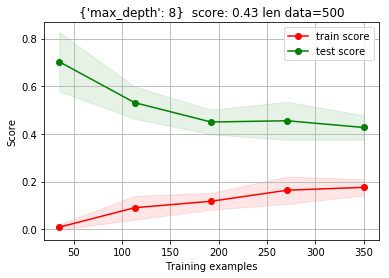

In [15]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## We obtained models with LOTS of variance!!! $\rightarrow$ increase data to 1k

In [16]:
d = pd.read_csv("local/data/cal_housing.data").sample(1000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print(X.shape, y.shape)
d.head()

(1000, 5) (1000,)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
3767,-118.43,34.17,35.0,2922.0,507.0,341800.0
9498,-123.73,39.17,20.0,4620.0,1042.0,158800.0
13162,-121.40,36.86,36.0,1256.0,270.0,145400.0
13202,-117.71,34.06,27.0,2127.0,628.0,91300.0
18225,-122.10,37.41,33.0,6277.0,1274.0,343300.0


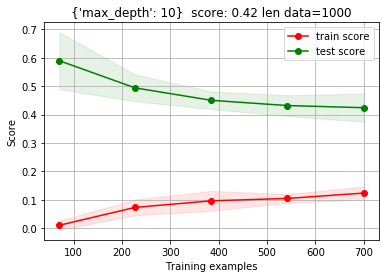

In [17]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 10k 

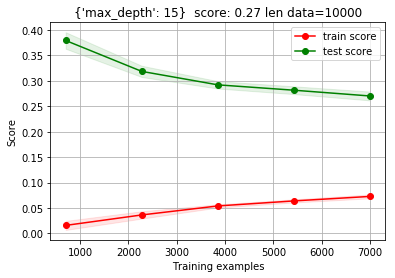

In [18]:

d = pd.read_csv("local/data/cal_housing.data").sample(10000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 20k (all available) 

- smaller increase
- very little variability
- still large variance!!!

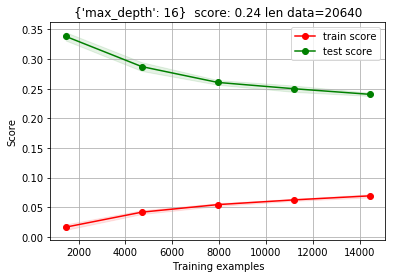

In [19]:
d = pd.read_csv("local/data/cal_housing.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## no more data available. let's try to add more information

- not much increase!!!


In [20]:
d = pd.read_csv("local/data/cal_housing_full.data")
d.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


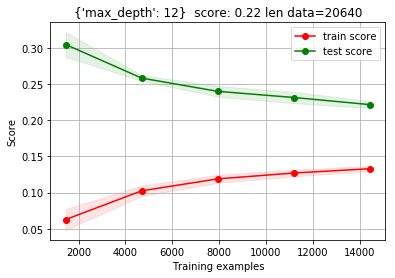

In [21]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)


## Let's observe geographical error distribution

In [22]:
d = pd.read_csv("local/data/cal_housing_full.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(Xtr,ytr)
print("train score", ch.rel_rmse(dt, Xtr, ytr))
print("test score ", ch.rel_rmse(dt, Xts, yts))
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1]=1
ch.plot_map(Xts[:3000,1], Xts[:3000,0], errs.reshape(-1,1))

train score 0.18138577604702655
test score  0.23153977962912653


## We now use this model to predict the price of a new house

In [23]:
newh = [[-118.22, 37.4, 10, 5000, 550, 8000, 200000, 3.5]]
dt.predict(newh)

array([226600.])

## Understand our model's response to each variable

In [24]:
d = pd.read_csv("local/data/cal_housing_full.data").sample(20000)

nsamples = 1000
ncols = len(d.columns)-1
sample = np.random.random(size=(nsamples, ncols))
sample = (sample*20.).astype(int)/20.
dsample = pd.DataFrame(sample, columns=d.columns[:-1])
for i in d.columns[:-1]:
    dsample[i] = MinMaxScaler(feature_range=(np.min(d[i]), np.max(d[i]))).fit_transform(dsample[i].values.reshape(-1,1))

ch.plot_map(dsample["latitude"], dsample["longitude"], dt.predict(sample).reshape(-1,1)/1e5, size=5)

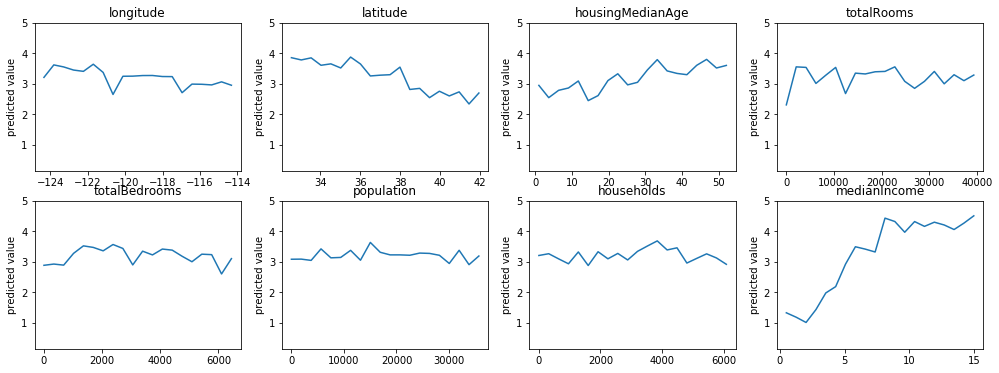

In [25]:
fig = plt.figure(figsize=(17,6))
c = 1
for col in dsample.columns:
    fig.add_subplot(2,4,c)
    c+=1
    x,y = [], []
    for i in np.unique(dsample[col]):
        x.append(i)

        dx = dsample[dsample[col]==i]
        y.append(np.mean(dt.predict(dx)/1e5))
    plt.plot(x,y)
    plt.ylabel("predicted value")
    plt.ylim(np.min(d["medianHouseValue"])/1e5, np.max(d["medianHouseValue"])/1e5)
    plt.title(col)
    

## Try using only visually meaningful columns

- another increase
- still variance

In [24]:
dfull = pd.read_csv("local/data/cal_housing_full.data")
d = dfull[["longitude", "latitude", "medianIncome", "medianHouseValue"]]
d.shape


(20640, 4)

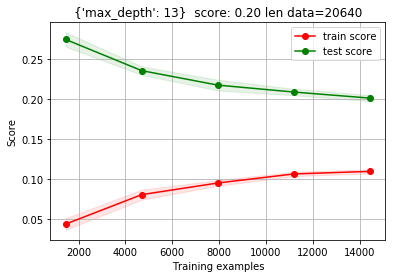

In [25]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

In [26]:
for i,col in enumerate(dfull.columns):
    if col!="medianHouseValue":
        print ("%20s %.3f"%(col, dt.feature_importances_[i]))

           longitude 0.156
            latitude 0.156
    housingMedianAge 0.057
          totalRooms 0.008
       totalBedrooms 0.012
          population 0.014
          households 0.013
        medianIncome 0.583
